In [1]:
# Napravit ćemo simulaciju ovjesa auta prema modelu s 1. predavanja.
# U ovoj varijanti rješenja "importamo" funkcije iz svih modula u globalni namespace. Tako ih je lakše koristiti (ne treba npr. prefix np) ali iz koda nije jasno iz kojeg modula dolazi koja funkcija. Ne preporuča se tako pisati kod.
from matplotlib.pyplot import *;
from numpy import *;
from control.matlab import *;
import math;

# Uz donju liniju će modul control generirati upozorenja ako pokušamo koristiti numpy.matrix umjesto numpy.array.
use_numpy_matrix(flag=False, warn=True); 

In [2]:
# Fizikalne veličine.
m1 = 2500;   # Masa tijela auta, u kg.
m2 = 320;    # Masa ovjesa, u kg.
k1 = 3000;   # Prva opruga, u N/m.
c1 = 1000;   # Prigušivač, u Ns/m.
k2 = 10000;  # Druga opruga, u N/m.

In [3]:
# Definicija LTI sustava.
A = array( [
    [0, 1, 0, 0],
    [-k1/m1, -c1/m1, k1/m1, c1/m1],
    [0, 0, 0, 1],
    [k1/m2, c1/m2, (-k1-k2)/m2, -c1/m2] ] );
B = array( [
    [0],
    [0],
    [0],
    [k2/m2] ] );
C = array( [
    [1, 0, 0, 0],
    [0, 0, 1, 0] ] );
D = array( [
    [0],
    [0] ] );

# Definiramo LTI pomoću funkcije ss iz modula control.
G = ss( A, B, C, D );

# Možemo pristupiti matricama iz LTI sustava G.
print( G.A );

# "Lijepi" ispis svih matrica iz LTI sustava G.
G

[[  0.      1.      0.      0.   ]
 [ -1.2    -0.4     1.2     0.4  ]
 [  0.      0.      0.      1.   ]
 [  9.375   3.125 -40.625  -3.125]]


StateSpace(array([[  0.   ,   1.   ,   0.   ,   0.   ],
       [ -1.2  ,  -0.4  ,   1.2  ,   0.4  ],
       [  0.   ,   0.   ,   0.   ,   1.   ],
       [  9.375,   3.125, -40.625,  -3.125]]), array([[ 0.  ],
       [ 0.  ],
       [ 0.  ],
       [31.25]]), array([[1., 0., 0., 0.],
       [0., 0., 1., 0.]]), array([[0.],
       [0.]]))

In [4]:
# Simulacija pomoću funkcije lsim iz modula control.

# Vremenski interval i input;
t = linspace( 0, 60, 600 );

# Input.
def uu( t ):
    if( t < 10 or t > 20 ):
        return 0;
    else:
        return 2*sin( (t-10)/10*math.pi );

# Primijenimo funkciju uu na svaki element polja t i rezultat spremimo u polje u.
u = array( list( map( uu, t ) ) );

# Početno stanje.
x0 = array( [[0], [0], [0], [0]] );

# Simulacija: yout = izlaz, tout = vremena, xout = stanja.
[yout, tout, xout] = lsim( G, u, t, x0 );

# Za svaki od 600 vremenskih koraka smo dobili po 2 izlaza (jer sustav G ima 2 izlaza, tj. matrica C ima 2 retka).
print( yout.shape )

(600, 2)


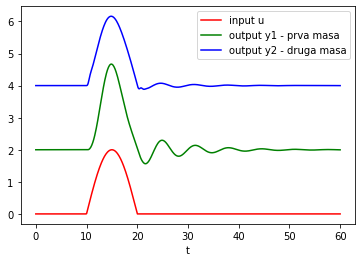

In [5]:
# Donja linija omogućava crtanje grafova, ali bez alata za kretanje po nacrtanoj slici.
%matplotlib inline 

# Donja linija omogućava crtanje grafova, te daje alate za kretanje po nacrtanoj slici. (Zahtijeva python paket ipympl.)
# %matplotlib widget 

# Crtamo input vs output.
f = figure;
plot( t, u, 'r-', label='input u' );
plot( tout, yout[:, 0] + 2, 'g-', label='output y1 - prva masa' );
plot( tout, yout[:, 1] + 4, 'b-', label='output y2 - druga masa' );
xlabel( 't' );
legend();
show();

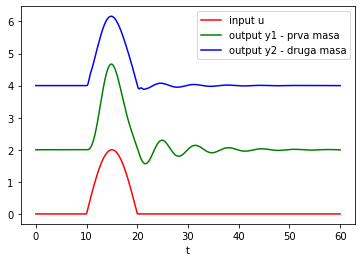

In [6]:
# Donja linija omogućava crtanje grafova, ali bez alata za kretanje po nacrtanoj slici.
%matplotlib inline 

# Donja linija omogućava crtanje grafova, te daje alate za kretanje po nacrtanoj slici. (Zahtijeva python paket ipympl.)
# %matplotlib widget 

# Simulaciju možemo naravno napraviti i pomoću funkcije odeint iz paketa scipy.
from scipy.integrate import odeint;

def f( x, t ):
    u = array( [uu(t)] );  # Zapakiramo u u vektor (tj. 1d-array).
    ff = A @ x + B @ u;    # ff = matrica @ vektor + matrica @ vektor = vektor

    return ff;

# odeint zahtjeva baš vektor, a ne Nx1 matricu kao početni uvjet...
x0 = array( [0, 0, 0, 0] );
x = odeint( f, x0, t );

y = C @ x.T + D;

f = figure;
plot( t, u, 'r-', label='input u' );
plot( t, y[0, :].T + 2, 'g-', label='output y1 - prva masa' );
plot( t, y[1, :].T + 4, 'b-', label='output y2 - druga masa' );
xlabel( 't' );
legend();
show();